## [1주차 과제]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   #히스토그램 출력할 때 사용

import os
import sys
import gc

from tqdm.auto import tqdm

import sklearn

In [2]:
# 함수 불러오기
from sklearn.datasets import fetch_california_housing

#데이터 불러오기
data = fetch_california_housing(as_frame=True)['frame']
#데이터 설명 출력
display(data)
description = fetch_california_housing(as_frame=True)['DESCR']
print(description)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### 1. Q2에서 했던 histogram을 보면, 자연스럽지 않은 분포를 보이는 값들을 볼 수 있다. 5.0을 넘는 모든 데이터를 삭제하고 다시 모델을 학습하여 평가하는 코드를 작성하고, 결과로 출력된 RMSE값이 왜 변하는지에 대해서 서술하세요.

(15740, 8) (3935, 8) (15740,) (3935,)


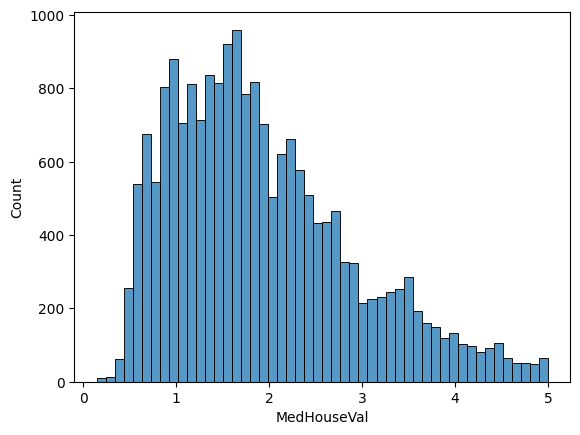

In [ ]:
#MedHouseVal>5.0인 data 삭제하기
data_modified = data[data['MedHouseVal'] <= 5.0]    #조건문으로 원하는 데이터만을 얻을 수 있게 함
sns.histplot(data_modified['MedHouseVal'])

# 데이터 분할에 사용할 데이터 정의
X = data_modified.drop(columns='MedHouseVal')    # feature vector
y =  data_modified.MedHouseVal   # target value

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
# 모델 불러오기
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# 모델 학습
reg.fit(X_train, y_train)
#=================================
# 검증에 사용될 함수 불러오기
from sklearn.metrics import mean_squared_error

train_preds = reg.predict(X_train)  # 모델의 학습 데이터 예측값
test_preds = reg.predict(X_test)    # 모델의 테스트 데이터 예측값

train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))  # 학습 데이터로 평가한 RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))     # 테스트 데이터로 평가한 RMSE

print("Train RMSE : %.4f" % train_rmse)
print("Test RMSE : %.4f" % test_rmse)

Train RMSE : 0.6381
Test RMSE : 0.6511


실습코드 Q2에서 5.0을 넘는 데이터를 삭제하기 이전의 경우에는

 Train RMSE : 0.7197

 Test RMSE : 0.7456  이었다.

하지만, 과제코드에서 5.0을 넘는 데이터를 삭제한 후의 데이터를 이용해서 학습시킨 경우에는

 Train RMSE : 0.6381

 Test RMSE : 0.6511  이 나오면서 데이터를 삭제하기 전보다 RMSE가 감소하였음을 알 수 있었다.

 Regression 모델에서 RMSE는 모델의 성능을 평가하기 위한 지표로 사용되는데, 이때 이 값이 0에 가까울수록 모델의 성능이 우수하다고 평가한다. 즉, 삭제하기 전보다 RMSE값이 감소하면서 모델의 성능이 개선되었다고 볼 수 있다.

  Regression 모델은 특정한 값을 맞추는 모델이다. 즉, 예측 가능한 값이 많을 수록 모델의 정확도가 향상된다고 생각한다. 실습코드 Q2에서 나왔던 히스토그램과 위에 작성한 코드의 히스토그램을 비교해보면 알 수 있다시피, 데이터를 삭제함으로써 자연스럽지 못했던 분포가 상당 부분 개선되었다. 즉, 삭제한 데이터는 "예측가능한" 상황에서 어긋나는 "예외"의 상황이라고 생각할 수 있다.

 이처럼 예외에 해당하는 데이터를 삭제하여 그 후의 데이터를 Regression 모델에 학습시킨 것이, 어떠한 값을 맞추는 Regression 모델의 성능에 긍정적인 영향을 미쳤다고 생각한다.

### 2. 1주차 실습에서는 Linear Regression을 사용하고 있습니다. 이 모델을 Random Forest로 바꿔보세요. Random Forest 모델을 사용할 때, hyper-parameter는 모두 기본값을 사용합니다. 그리고 RMSE를 측정해보고 성능의 변화가 있다면 왜 그런 변화가 생겼을지 생각해보고, 결과에 대해 생각을 정리해서 작성해주세요.

In [3]:
#data는 1주차 실습과 비교하기 위해 1주차 실습의 data와 동일하게 '5.0 이상의 값 삭제 전의 data'를 사용함
X2 = data.drop(columns='MedHouseVal')
y2 =  data.MedHouseVal

from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


In [5]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
# 모델 학습
reg_rf.fit(X2_train, y2_train)

#모델 성능 평가
from sklearn.metrics import mean_squared_error

train_preds2 = reg_rf.predict(X2_train)
test_preds2 = reg_rf.predict(X2_test)

train_rmse2 = np.sqrt(mean_squared_error(y2_train, train_preds2))
test_rmse2 = np.sqrt(mean_squared_error(y2_test, test_preds2))

print("Train RMSE : %.4f" % train_rmse2)
print("Test RMSE : %.4f" % test_rmse2)

Train RMSE : 0.1896
Test RMSE : 0.5061


1주차 실습은 Linear Regression을 사용한 모델로,

Train RMSE : 0.7197

Test RMSE : 0.7456  이 나왔었다.

2번은 Linear Regression 모델을 Random Forest Regression 모델로 바꾼 것으로,

Train RMSE : 0.1868

Test RMSE : 0.5049  이 나왔다.

모델 성능의 평가 지표인 RMSE가 감소한 것으로 보아, 2번에서 작성한 모델이 성능이 더 우수한 것을 알 수 있다.

Linear Regression 모델은 데이터가 x가 증가하면 y도 증가하는 직선 형태임을 전제로 하는 모델이다. 따라서 비선형 관계를 잘 이해하지 못하는 경향이 있고, "예외"상황이라고 생각할 수 있는 이상치에 영향을 많이 받는 모델이다.

반면, Random Forest Regression 모델의 경우에는 여러 개의 트리 구조를 결합하며 특정한 값을 예측하는 모델로, 비선형 관계를 가진 데이터를 잘 학습할 수 있는 모델이다. 또한, 이상치에 민감한 정도가 덜하다는 특징을 가지고 있다.

두 모델의 차이점을 살펴보면 왜 Random Forest Regression의 RMSE 값이 더 작게 나왔는지 알 수 있다.

두 모델에 공통적으로 사용한 데이터값은 실제로 수집된 데이터로, 항상 선형적인 패턴을 가질 수 없는 비선형적인 데이터이며, 예측가능한 패턴의 데이터가 아닌 예외적인 상황의 데이터 또한 포함된 데이터이다. 즉, Linear Regression 모델의 전제인 '선형적인 관계를 갖는 데이터일 것'과는 거리가 있는 데이터를 사용하고 있었던 것이다. 비선형 관계의 데이터를 선형관계를 학습하는 모델에 학습시키려고 하였기 때문에 RMSE값이 크게 나왔음을 알 수 있고, 그와 반대로 2번에서는 비선형관계를 잘 학습할 수 있는 모델에 학습시켰기 때문에 RMSE값이 감소하였음을 알 수 있다.

### 3. `선택 과제(advanced)` y = wx + b 의 simple Linear Regression model을 Gradient Descent Algorithm을 사용해서 학습하는 코드를 작성하고, 초기 랜덤 weight일 때의 그래프와 학습이 완료된 다음의 그래프를 출력하는 코드를 작성하세요.



초기 learning rate는 0.01로 세팅하고, 사용하는 데이터는 아래 코드를 그대로 사용하세요

```
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(42)
X = np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

# 생성된 데이터 plotting
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 1, 0, 15])
```



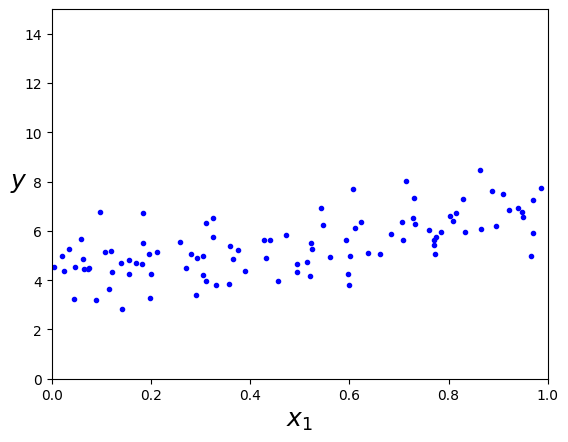

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(42)
X = np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)  # y = 4 + 3x + noise

# 생성된 데이터 plotting
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 1, 0, 15])

learning_rate = 0.01    #학습율
max_iterations = 1000   #최대 반복 횟수
